In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import analysis.plotting as plotting
import analysis.analysis as analysis


In [10]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ef_ssm=-0.1859, ro_amp=0.6, ef_amp=1, ro_freq=6.72742, ge_ssm=-0.114, qubit_thr=[-10000, -600], ge_amp=0.5, ge_time=66.83921813916868, RO_LO=6.6247, RO_IF=None, ef_time=77, qubit_id=q1, ROIF=0.10272000000000059, IQ_angle=205, ro_dur=4000, RO_LO_pwr=16)
Qubit(ef_ssm=-0.224, ro_amp=0.4, ef_amp=1, ro_freq=6.6556, ge_ssm=-0.154, qubit_thr=[-10000, 1900], ge_amp=1, ge_time=23.610582067254867, RO_LO=6.6247, RO_IF=None, ef_time=None, qubit_id=q2, ROIF=0.030899999999999928, IQ_angle=85, ro_dur=4000, RO_LO_pwr=16)


In [ ]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
num_steps = 3
reps = 100000
sweep_time = 500

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 36.219002 sec
Captured 98 buffers (2.705762 buffers per sec)
Captured 301056 records (8312.100868 records per sec)
Transferred 4932501504 bytes (136185460.614892 bytes per sec)


<Figure size 800x800 with 0 Axes>

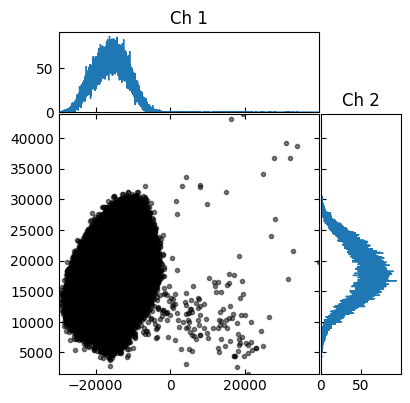

<Figure size 800x800 with 0 Axes>

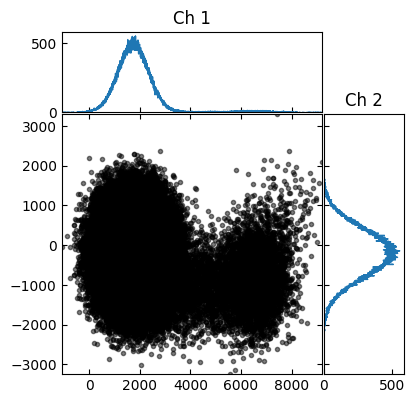

saved Q1G
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 34.265304 sec
Captured 98 buffers (2.860036 buffers per sec)
Captured 301056 records (8786.030362 records per sec)
Transferred 4932501504 bytes (143950321.455415 bytes per sec)


<Figure size 800x800 with 0 Axes>

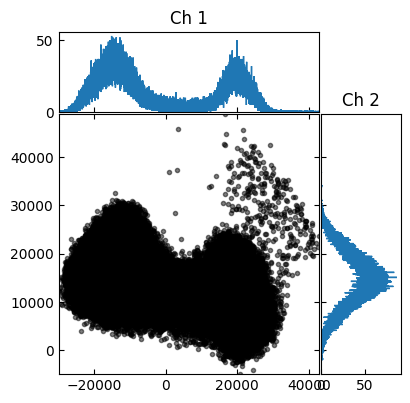

<Figure size 800x800 with 0 Axes>

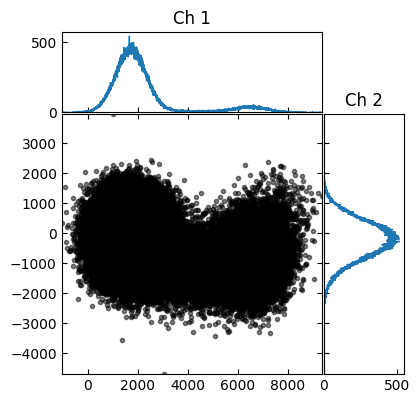

saved Q1E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 35.141048 sec
Captured 98 buffers (2.788761 buffers per sec)
Captured 301056 records (8567.075071 records per sec)
Transferred 4932501504 bytes (140362957.970061 bytes per sec)


<Figure size 800x800 with 0 Axes>

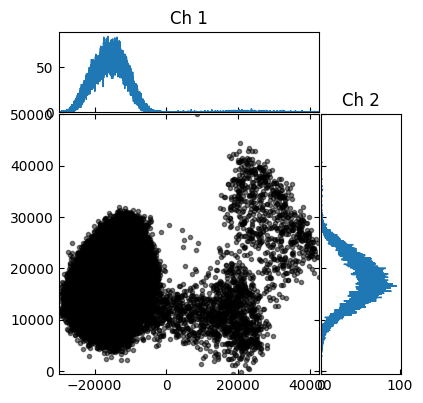

<Figure size 800x800 with 0 Axes>

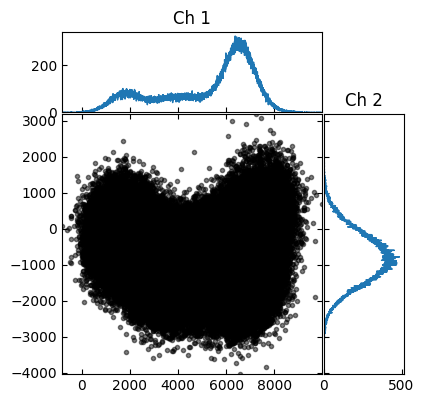

saved Q2E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 35.264141 sec
Captured 98 buffers (2.779027 buffers per sec)
Captured 301056 records (8537.170927 records per sec)
Transferred 4932501504 bytes (139873008.459886 bytes per sec)


<Figure size 800x800 with 0 Axes>

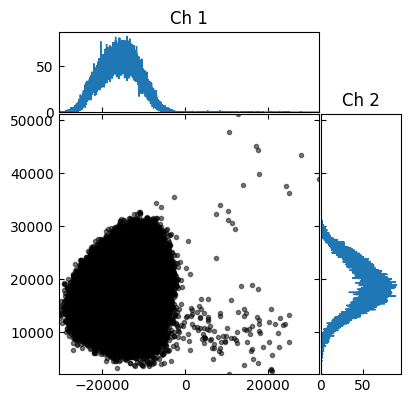

<Figure size 800x800 with 0 Axes>

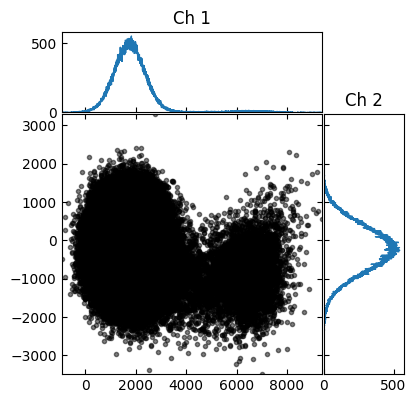

saved Q2G


In [12]:
for i in range(4):
    if 0 == i:
        label = 'Q1G'
        pnp.pi_nopi_ge(0,0,q1,q2,general_vals_dict)
    elif 1 == i:
        label = 'Q1E'
        # E prep
        pnp.pi_nopi_ge(1,0,q1,q2,general_vals_dict)
    elif 2 == i:
        label = 'Q2E'
        # F prep
        pnp.pi_nopi_ge(1,0,q2,q1,general_vals_dict)
    elif 3 == i:
        label = 'Q2G'
        # F prep
        pnp.pi_nopi_ge(0,0,q2,q1,general_vals_dict)


    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(q1, q2,
                    num_patterns=num_steps, num_records_per_pattern=reps,
                        verbose=True)

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0:reps*num_steps]
    Q1_raw = values.rec_readout_1[1][0:reps*num_steps]
    I2_raw = values.rec_readout_2[0][0:reps*num_steps]
    Q2_raw = values.rec_readout_2[1][0:reps*num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({
        "I1": I1_raw,
        "Q1": Q1_raw,
        "I2": I2_raw,
        "Q2": Q2_raw
    })

    IQ_df.to_csv(f'temp_training_data_swap_gate_test/IQraw{label}.csv')
    print(f"saved {label}")